#### Importing Relevant Libraries

In [1]:
import os
os.chdir('/content/drive/MyDrive/Tasks/QUANTIUM/Task 1')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Loading the data

In [3]:
lylty_data=pd.read_csv('QVI_purchase_behaviour.csv')
txn=pd.read_csv('QVI_transaction.csv')
data=pd.read_csv('cleaned_data.csv')
txn_data=txn.copy()

In [4]:
txn_data.drop_duplicates(subset='TXN_ID',inplace=True)
lylty_data.drop_duplicates(subset='LYLTY_CARD_NBR',inplace=True)
data.drop_duplicates(subset='TXN_ID',inplace=True)


The merged data was preprocessed for analysis in another code.

In [5]:
lylty_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [6]:
txn_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_NAME,PROD_WT
0,43390,1,1000,1,5,2,6.0,Natural Chip Compny SeaSalt,175
1,43599,1,1307,348,66,3,6.3,CCs Nacho Cheese,175
2,43605,1,1343,383,61,2,2.9,Smiths Crinkle Cut Chips Chicken,170
3,43329,2,2373,974,69,5,15.0,Smiths Chip Thinly S/Cream&Onion,175
4,43330,2,2426,1038,108,3,13.8,Kettle Tortilla ChpsHny&Jlpno Chili,150


In [7]:
data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_WT,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt,175,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli,150,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives,210,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn,175,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips,160,1,1.9


### Analysing the customer categories as a whole.

#### Whole population of the lifestages

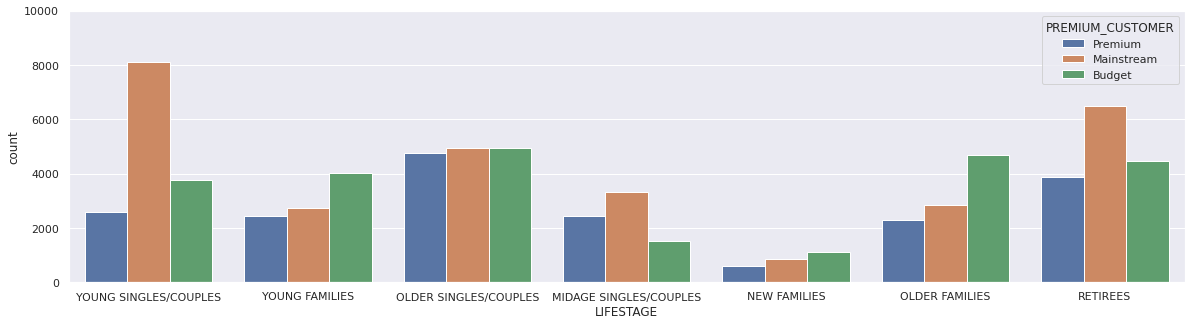

In [8]:
plt.figure(figsize=(20,5))
sns.countplot(x='LIFESTAGE',hue='PREMIUM_CUSTOMER',data=lylty_data)
plt.ylim(0,10000)
plt.show()

##### Inferences drawn from this bar graph:
- There seems to be a less customers who belong to a new family and those who are midage singles/couples.
- Mainstream card seems to be more popular .






#### Total sales by each category

In [9]:
cust_sales=data[['LYLTY_CARD_NBR','TOT_SALES']]
cust_sales=cust_sales.groupby('LYLTY_CARD_NBR').sum()
cust_sales=cust_sales.reset_index()
lylty_sales=pd.merge(cust_sales,lylty_data)
lylty_sales=lylty_sales.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).sum()
lylty_sales=lylty_sales.reset_index()

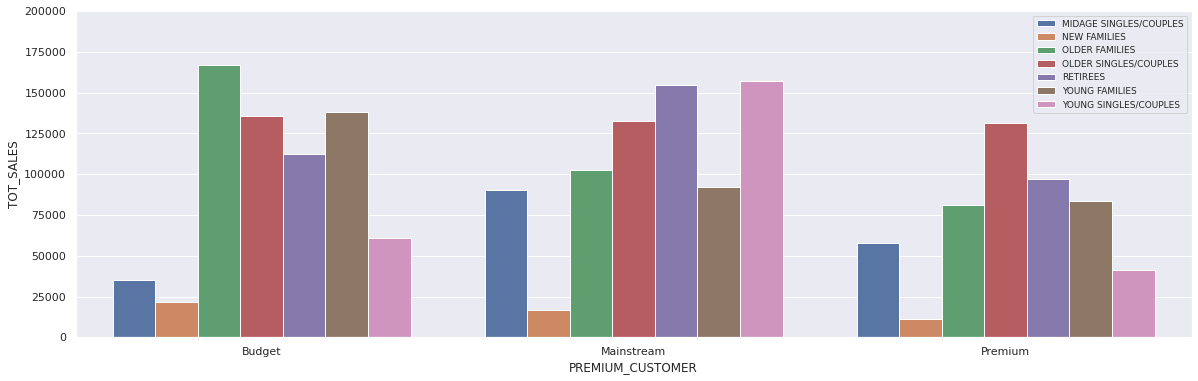

In [10]:
plt.figure(figsize=(20,6))
sns.barplot(x='PREMIUM_CUSTOMER',y='TOT_SALES',hue='LIFESTAGE',data=lylty_sales)
plt.ylim(0,200000)
plt.legend(prop={'size':9})
plt.show()

##### Inferences drawn from this bar graph
* Lifestages pulling most of the sales from these categories (Ranked):
* Budget:
  * Older Families
  * Young families 
  * Older singles/couples
  * Retirees
* Mainstream:
  * Young Singles/Couples
  * Retirees
  * Older Singles/Couples
* Premium
  * Older Singles/Couples  

In [11]:
temp_data=data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum()
temp_data.head()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget               9434
                        Mainstream          22557
                        Premium             15416
NEW FAMILIES            Budget               5543
                        Mainstream           4311
Name: PROD_QTY, dtype: int64

### Analysis on products

In [12]:
txn_data['PROD_PRICE']=txn_data['TOT_SALES']/txn_data['PROD_QTY']
prod_data=txn_data[['PROD_NAME','PROD_WT','PROD_QTY','TOT_SALES','PROD_PRICE']]

In [13]:
wt_sales=prod_data[['PROD_WT','TOT_SALES']]
wt_sales=wt_sales.groupby('PROD_WT').sum().reset_index()

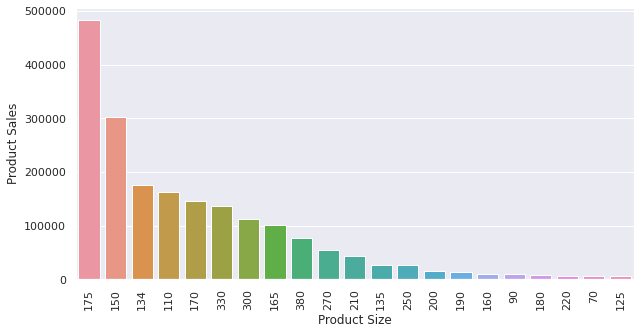

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(y='TOT_SALES',x='PROD_WT',data=wt_sales,order=wt_sales.sort_values('TOT_SALES',ascending=False).PROD_WT)
plt.xticks(rotation=90)
plt.xlabel('Product Size')
plt.ylabel('Product Sales')
plt.show()

In [15]:
total_sales=txn_data['TOT_SALES'].sum()
sales_larger_pack=wt_sales[wt_sales['PROD_WT']>200]
perc_multi_pack=float((sales_larger_pack['TOT_SALES'].sum()/total_sales))
print('{:.0%} of the sales is from multipacks.'.format(perc_multi_pack))

24% of the sales is from multipacks.


Multipacks or larger packages make up about 24% of the total sales. </br>
(>200g)
Product sizes that makes:
* the most sales
  * 175g
  * 150g
* the least sales
  * 125g
  * 220g
  * 70g
  * 180g
  * 90g
  * 160g
  * 190g
  * 200g
 

In [16]:
temp_data1=data[['LIFESTAGE','PREMIUM_CUSTOMER','PROD_QTY']].groupby(["LIFESTAGE",'PREMIUM_CUSTOMER']).sum()
temp_data1.reset_index(inplace=True)
temp_data2=data[['LIFESTAGE','PREMIUM_CUSTOMER','LYLTY_CARD_NBR']].groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).nunique().reset_index()
temp_data=pd.merge(temp_data1,temp_data2)
temp_data['PROD/CUST']=temp_data['PROD_QTY']/temp_data['LYLTY_CARD_NBR']

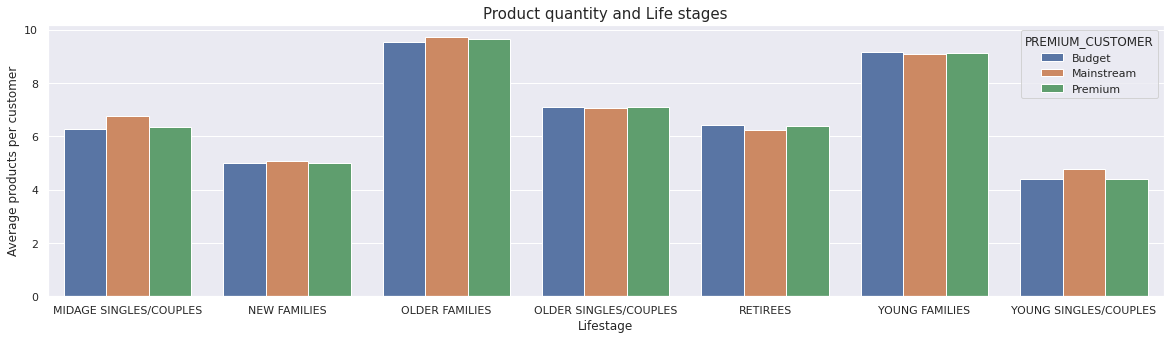

In [17]:
plt.figure(figsize=(20,5))
sns.barplot(x='LIFESTAGE',y='PROD/CUST',hue='PREMIUM_CUSTOMER',data=temp_data)
plt.title('Product quantity and Life stages',fontsize=15)
plt.xlabel('Lifestage')
plt.ylabel('Average products per customer')
plt.show()

### Stores

In [18]:
store_data=txn_data[['STORE_NBR','DATE','PROD_NBR','PROD_QTY','TOT_SALES']]

In [19]:
store_sales=store_data[['STORE_NBR','TOT_SALES']]
store_sales=store_sales.groupby('STORE_NBR').sum()
store_sales=store_sales.rename(columns={'TOT_SALES':'STORE_SALES'}).reset_index()
txn_data=pd.merge(txn_data,store_sales)
data=pd.merge(data,store_sales)

### Time Trends

In [20]:
date=txn_data.copy()
date['DATE']=pd.to_datetime(date['DATE'],unit='D',origin= '1899-12-30')
date.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_NAME,PROD_WT,PROD_PRICE,STORE_SALES
0,2018-10-17,1,1000,1,5,2,6.0,Natural Chip Compny SeaSalt,175,3.00,2384.4
1,2019-05-14,1,1307,348,66,3,6.3,CCs Nacho Cheese,175,2.10,2384.4
2,2019-05-20,1,1343,383,61,2,2.9,Smiths Crinkle Cut Chips Chicken,170,1.45,2384.4
3,2018-09-05,1,1052,57,44,1,3.3,Thins Chips Light& Tangy,175,3.30,2384.4
4,2018-09-27,1,1081,92,17,1,4.6,Kettle Sensations BBQ&Maple,150,4.60,2384.4


In [21]:
date['MONTH']=date['DATE'].dt.month_name()
date['MONTH_NBR']=date['DATE'].dt.month
date['YEAR']=date['DATE'].dt.year
date.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_NAME,PROD_WT,PROD_PRICE,STORE_SALES,MONTH,MONTH_NBR,YEAR
0,2018-10-17,1,1000,1,5,2,6.0,Natural Chip Compny SeaSalt,175,3.00,2384.4,October,10,2018
1,2019-05-14,1,1307,348,66,3,6.3,CCs Nacho Cheese,175,2.10,2384.4,May,5,2019
2,2019-05-20,1,1343,383,61,2,2.9,Smiths Crinkle Cut Chips Chicken,170,1.45,2384.4,May,5,2019
3,2018-09-05,1,1052,57,44,1,3.3,Thins Chips Light& Tangy,175,3.30,2384.4,September,9,2018
4,2018-09-27,1,1081,92,17,1,4.6,Kettle Sensations BBQ&Maple,150,4.60,2384.4,September,9,2018


In [22]:
date_trans=date[['YEAR','MONTH','MONTH_NBR','STORE_NBR','TOT_SALES']]
date_trans.head()

,YEAR,MONTH,MONTH_NBR,STORE_NBR,TOT_SALES
0,2018,October,10,1,6.0
1,2019,May,5,1,6.3
2,2019,May,5,1,2.9
3,2018,September,9,1,3.3
4,2018,September,9,1,4.6


In [23]:
month_sales=date_trans[['YEAR','MONTH_NBR','TOT_SALES']].groupby(['YEAR','MONTH_NBR']).sum().reset_index()
month_sales['Month']=month_sales['YEAR'].astype(str)+ '-' + month_sales['MONTH_NBR'].astype(str)
month_sales.drop(['YEAR','MONTH_NBR'],axis=1,inplace=True)
month_sales.head()

,TOT_SALES,Month
0,164365.70,2018-7
1,157757.85,2018-8
2,159385.30,2018-9
3,163426.10,2018-10
4,159173.80,2018-11


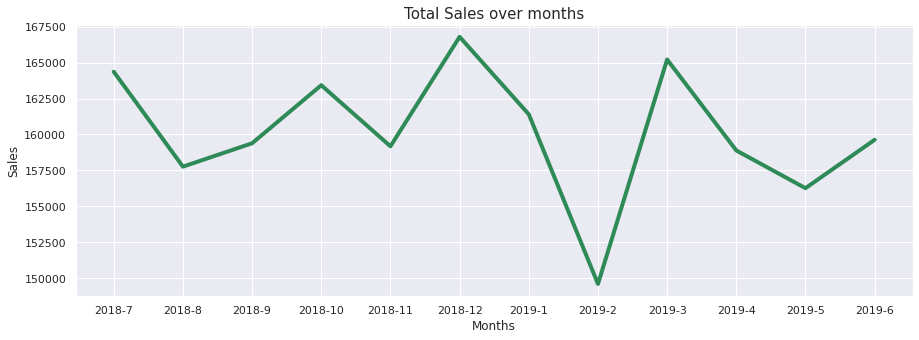

In [24]:
plt.figure(figsize=(15,5))
plt.plot(month_sales['Month'],month_sales['TOT_SALES'],color='seagreen',linewidth=4)
plt.title('Total Sales over months',fontsize=15)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

##### The stores pulled a peak sale during the christmas time

##### There has been a significant fall in sales after January 2019

#### Transactions over time

In [25]:
month_trans=date_trans[['YEAR','MONTH_NBR']]
month_trans['count']=1
month_trans=month_trans.groupby(['YEAR','MONTH_NBR']).sum().reset_index()
month_trans['Month']=month_trans['YEAR'].astype(str)+ '-' + month_trans['MONTH_NBR'].astype(str)
month_trans.drop(['YEAR','MONTH_NBR'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


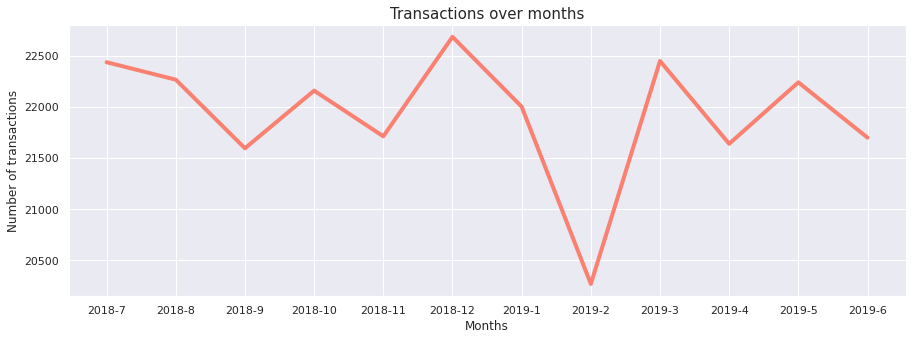

In [26]:
plt.figure(figsize=(15,5))
plt.plot(month_trans['Month'],month_trans['count'],color='salmon',linewidth=4)
plt.title('Transactions over months',fontsize=15)
plt.xlabel('Months')
plt.ylabel('Number of transactions')
plt.show()

##### The sales and the number of transactions were at their peak during the christmas time i.e, between november and January.
##### The transactions dropped drastically after January 2019